### Loading saved simulations

In [52]:
import yaml
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
results_file = 'long_0'

to_load = 'to_load/'
filename = to_load + results_file

with open (filename, 'rb') as fp:
    results_0 = pickle.load(fp)

In [ ]:
results = results_0['eval']

In [ ]:
results

In [ ]:
# Test experiment index
index = 0

res = results[index]
res['dataset']

In [ ]:
figure, ax = plt.subplots(figsize=[10,5])

# T41
ax.plot([res['dataset']['current_state'][step][2] for step in range(len(res['dataset']['current_state']))], 
        label='T41')

# T42
ax.plot([res['dataset']['current_state'][step][3] for step in range(len(res['dataset']['current_state']))], 
        label='T42')

ax.legend()

In [ ]:
# ANYTOWN pump_ids
pump_ids = ['P78', 'P79'] 
pumps_dict = {pump_id: [] for pump_id in pump_ids}

# Transform actions to binaries values from actions
actions = [res['dataset']['action'][step][0] for step in range(len(res['dataset']['current_state']))]
for action in actions:
    bin_action = '{0:0{width}b}'.format(action, width=len(pump_ids))
    for i, pump_id in enumerate(pump_ids):
        pumps_dict[pump_id].append(int(bin_action[i]))

In [ ]:
figure, ax = plt.subplots(figsize=[10,5])

# PUMPS
for pump in pumps_dict:
    ax.plot(pumps_dict[pump], label=pump)

ax.legend()

In [ ]:
figure, ax = plt.subplots(figsize=[10,5])
lines, = ax.plot([results_full[0]['q_values'][i][0][0] + 86400 * (results_full[0]['q_values'][i][0][1] - 1) for i in range(len(results_full[0]['q_values']))],
                [results_full[0]['q_values'][i][1][0] for i in range(len(results_full[0]['q_values']))],
                label='full', alpha=0.7)
ax.legend()
ax.set_title('Action 0 - demand_pat 130')

In [34]:
res[0]['dataset']

,current_state,action,reward,next_state,absorbing_state,last_step
0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",[2],0.5,"[1.0, 600.0, 3.9364069, 3.6936264, 86.18761, 0...",False,False
1,"[1.0, 600.0, 3.9364069, 3.6936264, 86.18761, 0...",[1],0.0,"[1.0, 1200.0, 4.7922144, 4.335268, 86.22595, 0...",False,False
2,"[1.0, 1200.0, 4.7922144, 4.335268, 86.22595, 0...",[1],1.0,"[1.0, 1800.0, 5.619491, 4.9750257, 86.264084, ...",False,False
3,"[1.0, 1800.0, 5.619491, 4.9750257, 86.264084, ...",[1],1.0,"[1.0, 2400.0, 6.3167486, 5.538295, 82.38568, 0...",False,False
4,"[1.0, 2400.0, 6.3167486, 5.538295, 82.38568, 0...",[1],1.0,"[1.0, 3000.0, 6.992476, 6.100057, 82.544395, 0...",False,False
...,...,...,...,...,...,...
181,"[1.0, 59400.0, 7.9921865, 7.905814, 68.400856,...",[1],1.0,"[1.0, 59523.0, 8.126831, 8.000133, 82.998, 0.0...",False,False
182,"[1.0, 59523.0, 8.126831, 8.000133, 82.998, 0.0...",[1],1.0,"[1.0, 60000.0, 7.993704, 7.9067388, 68.401726,...",False,False
183,"[1.0, 60000.0, 7.993704, 7.9067388, 68.401726,...",[1],1.0,"[1.0, 60122.0, 8.12724, 8.000294, 82.99833, 0....",False,False
184,"[1.0, 60122.0, 8.12724, 8.000294, 82.99833, 0....",[1],1.0,"[1.0, 60600.0, 7.9937763, 7.906762, 68.40198, ...",False,False


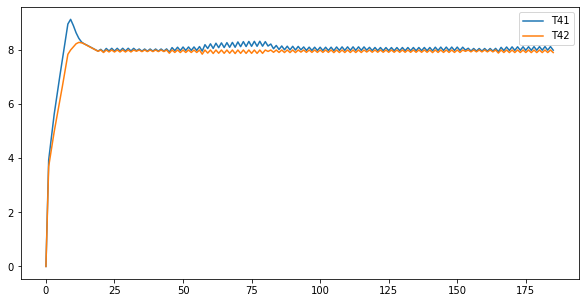

In [32]:
figure, ax = plt.subplots(figsize=[10,5])

#T41
ax.plot([res[0]['dataset']['action'][step][0] for step in range(len(res[0]['dataset']['current_state']))], 
        label='T41')

ax.legend()

In [ ]:
figure, ax = plt.subplots(figsize=[10,5])

#T41
ax.plot([res[0]['dataset']['current_state'][step][2] for step in range(len(res[0]['dataset']['current_state']))], 
        label='T41')

#T42
ax.plot([res[0]['dataset']['current_state'][step][3] for step in range(len(res[0]['dataset']['current_state']))], 
        label='T42')

ax.legend()

Text(0.5, 1.0, 'Action 0 - demand_pat 130')

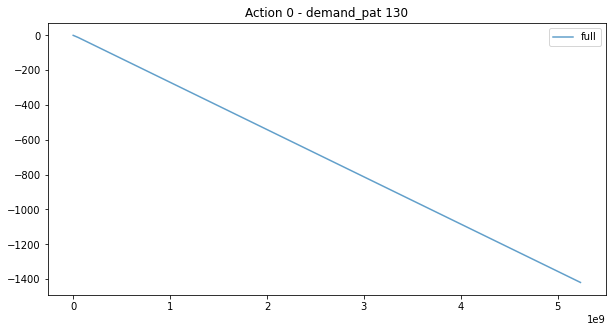

In [8]:
figure, ax = plt.subplots(figsize=[10,5])
lines, = ax.plot([results_full[0]['q_values'][i][0][0] + 86400 * (results_full[0]['q_values'][i][0][1] - 1) for i in range(len(results_full[0]['q_values']))],
                [results_full[0]['q_values'][i][1][0] for i in range(len(results_full[0]['q_values']))],
                label='full', alpha=0.7)
ax.legend()
ax.set_title('Action 0 - demand_pat 130')

In [6]:
import seaborn as sns

def plot_model_heatmap(data, index, title='', color=None, annot=False, columns=['action 0', 'action 1', 'action 2', 'action 3']):   
    df = pd.DataFrame(data, index=index, columns=columns)
    
    figure, ax = plt.subplots(figsize=(10,7))
    if color:
        ax = sns.heatmap(df, cmap=color, annot=annot)
    else:
        ax = sns.heatmap(df, annot=annot)
    
    if title:
        ax.set_title(title)

In [7]:
def crop_dataset(model, seed):
    
    # Build the boolean list of timestep of q_values which are present also in dataset 
    time_idx = [model[seed]['dataset']['current_state'][i][:2] for i in range(len(model[seed]['dataset']))]
    qs_idx = [model[seed]['q_values'][i][0] for i in range(len(model[seed]['q_values']))]
    bool_idx = [True if time_idx[i] in qs_idx else False for i in range(len(model[seed]['dataset']))]

    # Select which data we want to keep based on the boolean list
    cropped_dataset = model[seed]['dataset'].copy()
    for i in cropped_dataset.index:
        if not bool_idx[i]:
            cropped_dataset.drop(axis=0, index=i, inplace=True)
    return cropped_dataset

In [8]:
dat_full = crop_dataset(results_full, 0)
dat_full['current_state']

0                        [0.0, 1.0, 0.0, 0.0, 0.0]
1       [0.0, 1.0, 3.0500748, 3.0476344, 85.35038]
2            [2.0, 1.0, 3.048419, 3.048, 84.71333]
3               [3.0, 1.0, 3.048, 3.048, 84.71315]
5             [1203.0, 1.0, 3.048, 3.048, 82.8128]
                           ...                    
1024       [83400.0, 7.0, 3.048, 3.048, 82.716156]
1025       [84000.0, 7.0, 3.048, 3.048, 82.716156]
1026       [84600.0, 7.0, 3.048, 3.048, 82.716156]
1027       [85200.0, 7.0, 3.048, 3.048, 82.716156]
1028       [85800.0, 7.0, 3.048, 3.048, 82.716156]
Name: current_state, Length: 989, dtype: object

In [10]:
len(model_epynet['train'])

5

In [11]:
train_results = model_epynet['train']

for j, res in enumerate(train_results):
    qs = ([q[1] for q in res])
    df_qs = pd.DataFrame(qs, columns=['0', '1', '2', '3'])
    df_qs['0'].plot(label="eval_{}".format(j))
    plt.legend()
            
plt.show()

TypeError: 'NoneType' object is not iterable

In [12]:
results_model_full = model_step['eval']
results_new = model_epynet['eval']
                                

In [13]:
len(results_new)

5

Let's try to plot the heatmap of the Q-values to see how they evolve during the simulation.

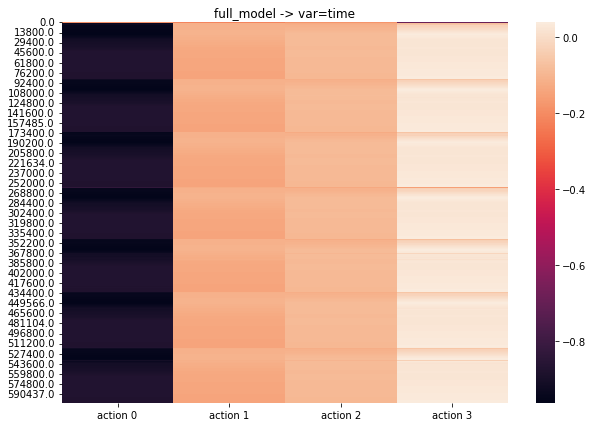

In [22]:
#model = results_full
#model = results_step_update
model  = results_model_full
#model = results_new<
seed = 0

qs = [model[seed]['q_values'][i][1] for i in range(len(model[seed]['q_values']))]
#index = [model[seed]['q_values'][i][0][0] for i in range(len(model[seed]['q_values']))]
index = [model[seed]['q_values'][i][0][0] + 86400 * (model[seed]['q_values'][i][0][1] - 1) for i in range(len(model[seed]['q_values']))]

plot_model_heatmap(qs, index, title='full_model -> var=time')

In [27]:
model[0]['q_values']

[[[0.0, 1.0],
  [-0.18546736240386963,
   -0.21870268881320953,
   -0.1836068034172058,
   -0.6916213035583496]],
 [[0.0, 1.0],
  [-0.9189745187759399,
   -0.11609488725662231,
   -0.13021287322044373,
   -0.0947781354188919]],
 [[2.0, 1.0],
  [-0.962835431098938,
   -0.11012482643127441,
   -0.1258023977279663,
   -0.056593120098114014]],
 [[3.0, 1.0],
  [-0.9338898658752441,
   -0.11400572955608368,
   -0.12860211730003357,
   -0.08163174241781235]],
 [[603.0, 1.0],
  [-0.8362196683883667,
   -0.1247308999300003,
   -0.13137874007225037,
   -0.15284346044063568]],
 [[1203.0, 1.0],
  [-0.9265687465667725,
   -0.11381912231445312,
   -0.11864402890205383,
   -0.06075233593583107]],
 [[1803.0, 1.0],
  [-0.9504740238189697,
   -0.11042490601539612,
   -0.11317595839500427,
   -0.0310513973236084]],
 [[2403.0, 1.0],
  [-0.9501297473907471,
   -0.11048275232315063,
   -0.11248546838760376,
   -0.02869412675499916]],
 [[3003.0, 1.0],
  [-0.949785590171814,
   -0.11054055392742157,
   -0.111

Now we try to aggregate Q-values, choosing a certain interval of time, to see how the system behaves in that specific part of the day.

In [23]:
#model = results_full
#model = results_step_update
model  = results_model_full
#model = results_new
seed = 0
interval = 14400 # one hour
day = 86400

n_intervals = int(day / interval)

avg_q = {str(key): [0, 0, 0, 0] for key in range(n_intervals)}
count_q = {str(key): 0 for key in range(n_intervals)}

for q_step in model[seed]['q_values']:
    mod = str(int(q_step[0][0] // interval))
    avg_q[mod] = [avg_q[mod][i] + q_step[1][i] for i in range(len(avg_q[mod]))]
    count_q[mod] += 1

In [24]:
for i in avg_q.keys():
    avg_q[i] = [avg_q[i][j] / count_q[i] for j in range(4)]

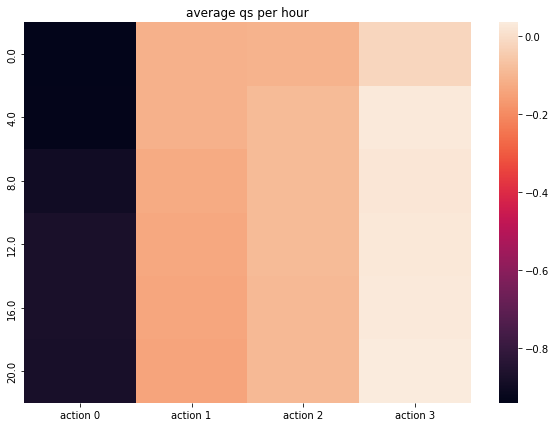

In [25]:
qs = list(avg_q.values())
index = [(0 + interval * i) / 3600 for i in range(n_intervals)]

plot_model_heatmap(qs, index, title='average qs per hour')

Now we want to print how the Q-values are distributed among the different days of the week.

In [17]:
model = results_full
#model = results_step_update
model  = results_model_full
model = results_new
seed = 0

avg_q = {str(key): [0, 0, 0, 0] for key in range(1,8)}
count_q = {str(key): 0 for key in range(1,8)}

for q_step in model[seed]['q_values']:
    mod = str(int(q_step[0][1]))
    avg_q[mod] = [avg_q[mod][i] + q_step[1][i] for i in range(len(avg_q[mod]))]
    count_q[mod] += 1

In [18]:
for i in avg_q.keys():
    avg_q[i] = [avg_q[i][j] / count_q[i] for j in range(4)]

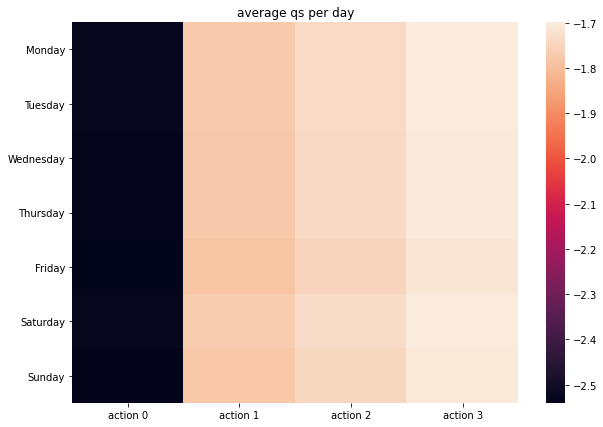

In [19]:
qs = list(avg_q.values())
index = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plot_model_heatmap(qs, index, title='average qs per day')

Now we want to split in discrete intervals the value of the level of tank 41. We will plot the heatmap of Q-values associated with each interval.

In [28]:
model = results_full
#model = results_step_update
model  = results_model_full
#model = results_new
seed = 0

tank41_levels = [model[seed]['dataset']['current_state'][i][2] for i in range(1, len(model[seed]['dataset']))]
max_level = max(tank41_levels)
min_level = min(tank41_levels)

print("min level: ", min_level)
print("max level: ", max_level)

interval = (max_level - min_level) / 8

avg_q = {str(key): [0, 0, 0, 0] for key in range(9)}
count_q = {str(key): 0 for key in range(9)}

tmp_dataset = crop_dataset(model, seed).iloc[1: , :]


for i, q_step in enumerate(model[seed]['q_values'][1:]):
    mod = str(int((tmp_dataset['current_state'].iloc[i][2] - min_level) // interval))
    avg_q[mod] = [avg_q[mod][j] + q_step[1][j] for j in range(len(avg_q[mod]))]
    count_q[mod] += 1

min level:  3.0475454
max level:  6.970158


In [29]:
count_q

{'0': 786,
 '1': 34,
 '2': 22,
 '3': 19,
 '4': 29,
 '5': 36,
 '6': 51,
 '7': 7,
 '8': 1}

In [30]:
for i in avg_q.keys():
    avg_q[i] = [avg_q[i][j] / count_q[i] for j in range(4)]

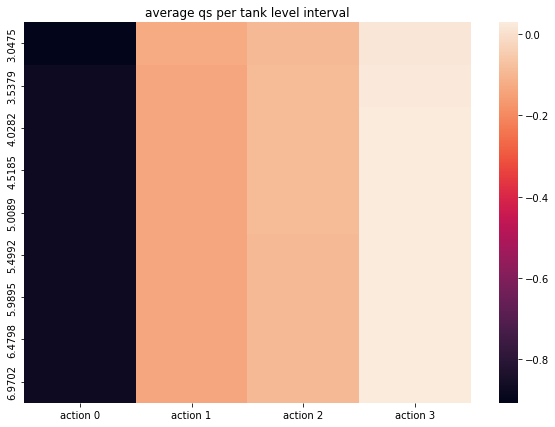

In [31]:
qs = list(avg_q.values())
index = [str(round(min_level + int(key) * interval, 4)) for key in avg_q.keys()]

plot_model_heatmap(qs, index, title='average qs per tank level interval')

Considering one action at time, we want know to see the correlation between different variables in the state space. We are now trying to plot the heatmap to show these results.

In [32]:
# We can compare day_of_the_week and tank41_level for example each action
model = results_full
#model = results_step_update
model  = results_model_full
#model = results_new
seed = 0

tank41_levels = [model[seed]['dataset']['current_state'][i][2] for i in range(1, len(model[seed]['dataset']))]
max_level = max(tank41_levels)
min_level = min(tank41_levels)

print("min level: ", min_level)
print("max level: ", max_level)

interval = (max_level - min_level) / 8
tmp_dataset = crop_dataset(model, seed).iloc[1:, :]

avg_q_list = []
count_q_list = []

for action in range(4):
    avg_q = {str(key): [0, 0, 0, 0, 0, 0, 0] for key in range(9)}
    count_q = {str(key): [0, 0, 0, 0, 0, 0, 0] for key in range(9)}   

    for i, q_step in enumerate(model[seed]['q_values'][1:]):
        mod = str(int((tmp_dataset['current_state'].iloc[i][2] - min_level) // interval))
        day = int(q_step[0][1]) - 1
        avg_q[mod][day] += q_step[1][action]
        count_q[mod][day] += 1
    
    avg_q_list.append(avg_q)
    count_q_list.append(count_q)

min level:  3.0475454
max level:  6.970158


In [33]:
avg_q_list

[{'0': [-103.53919893503189,
   -105.10980427265167,
   -103.25844889879227,
   -105.91087037324905,
   -100.58530193567276,
   -103.48166263103485,
   -91.06681114435196],
  '1': [-6.998834788799286,
   -4.376631438732147,
   -1.751176357269287,
   -1.7495394945144653,
   -2.6258068680763245,
   -1.749825358390808,
   -10.494100987911224],
  '2': [-2.627833306789398,
   -3.5019230246543884,
   -1.751173973083496,
   -1.7499585151672363,
   -0.8749984502792358,
   -2.626431107521057,
   -6.124307096004486],
  '3': [-1.7514814734458923,
   -2.627058446407318,
   -1.7500744462013245,
   -2.6253288984298706,
   -3.5013946890830994,
   -1.7502433061599731,
   -2.6259357929229736],
  '4': [-3.5023722052574158,
   -5.255258500576019,
   -2.6264405250549316,
   -3.5011086463928223,
   -2.6257777214050293,
   -4.378429114818573,
   -3.5011743903160095],
  '5': [-3.5027868151664734,
   -4.378863096237183,
   -3.501915693283081,
   -6.129457414150238,
   -5.2541250586509705,
   -5.25483399629592

In [34]:
count_q_list

[{'0': [114, 116, 114, 117, 111, 114, 100],
  '1': [8, 5, 2, 2, 3, 2, 12],
  '2': [3, 4, 2, 2, 1, 3, 7],
  '3': [2, 3, 2, 3, 4, 2, 3],
  '4': [4, 6, 3, 4, 3, 5, 4],
  '5': [4, 5, 4, 7, 6, 6, 4],
  '6': [10, 0, 14, 0, 8, 13, 6],
  '7': [0, 0, 1, 0, 0, 0, 6],
  '8': [0, 0, 0, 0, 0, 0, 1]},
 {'0': [114, 116, 114, 117, 111, 114, 100],
  '1': [8, 5, 2, 2, 3, 2, 12],
  '2': [3, 4, 2, 2, 1, 3, 7],
  '3': [2, 3, 2, 3, 4, 2, 3],
  '4': [4, 6, 3, 4, 3, 5, 4],
  '5': [4, 5, 4, 7, 6, 6, 4],
  '6': [10, 0, 14, 0, 8, 13, 6],
  '7': [0, 0, 1, 0, 0, 0, 6],
  '8': [0, 0, 0, 0, 0, 0, 1]},
 {'0': [114, 116, 114, 117, 111, 114, 100],
  '1': [8, 5, 2, 2, 3, 2, 12],
  '2': [3, 4, 2, 2, 1, 3, 7],
  '3': [2, 3, 2, 3, 4, 2, 3],
  '4': [4, 6, 3, 4, 3, 5, 4],
  '5': [4, 5, 4, 7, 6, 6, 4],
  '6': [10, 0, 14, 0, 8, 13, 6],
  '7': [0, 0, 1, 0, 0, 0, 6],
  '8': [0, 0, 0, 0, 0, 0, 1]},
 {'0': [114, 116, 114, 117, 111, 114, 100],
  '1': [8, 5, 2, 2, 3, 2, 12],
  '2': [3, 4, 2, 2, 1, 3, 7],
  '3': [2, 3, 2, 3, 4, 2, 3]

In [35]:
# Remember to change how this work when we use update_every results
for avg_q in avg_q_list:
    for i in avg_q.keys():
        avg_q[i] = [avg_q[i][j] / count_q[i][j] if count_q[i][j] > 0 else -5 for j in range(7)]
        # avg_q[i] = [avg_q[i][j] / count_q[i][j] if count_q[i][j] > 0 else 0 for j in range(7)]

Text(0.5, 1.0, 'action 3 --> days - tank41_level')

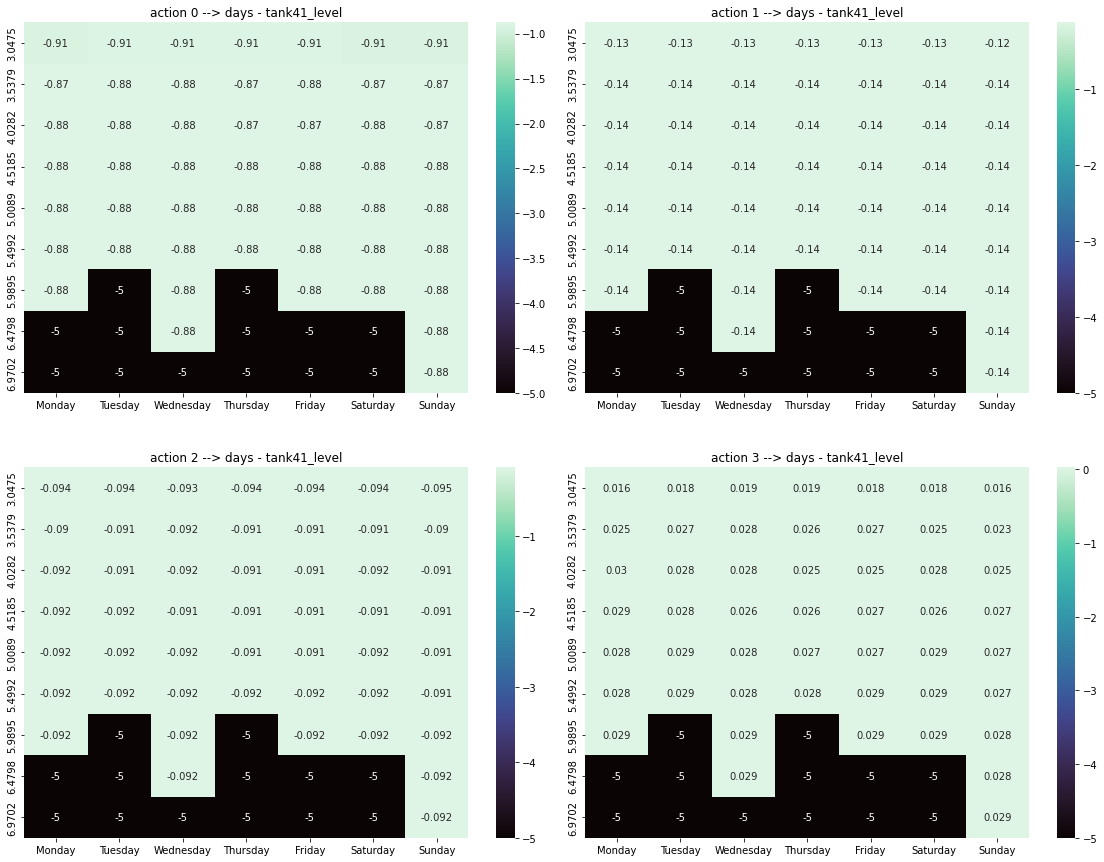

In [36]:
index = [str(round(min_level + int(key) * interval, 4)) for key in avg_q_list[0].keys()]
columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

figure, axs = plt.subplots(2, 2, figsize=(20,15))
figure.subplots_adjust(hspace = .2, wspace=.01)

axs = axs.ravel()

for i in range(4):
    qs = list(avg_q_list[i].values())
    df = pd.DataFrame(qs, index=index, columns=columns)
    sns.heatmap(df, ax=axs[i], cmap='mako',annot=True)
       
axs[0].set_title("action 0 --> days - tank41_level")
axs[1].set_title("action 1 --> days - tank41_level")
axs[2].set_title("action 2 --> days - tank41_level")
axs[3].set_title("action 3 --> days - tank41_level")

We want to plot the occurrences of the actions given the tank41 level and the time

In [30]:
# We can compare time and tank41_level for example each action
#model = results_full
#model = results_step_update
#model  = results_model_full
model = results_new
seed = 0

tank41_levels = [model[seed]['dataset']['current_state'][i][2] for i in range(1, len(model[seed]['dataset']))]
max_level = max(tank41_levels)
min_level = min(tank41_levels)

print("min level: ", min_level)
print("max level: ", max_level)

interval = (max_level - min_level) / 8
tmp_dataset = crop_dataset(model, seed).iloc[1:, :]

count_q_list = []

for action in range(4):
    count_q = {str(key): [0] * 24 for key in range(9)}

    for i, q_step in enumerate(model[seed]['q_values'][1:]):
        mod = str(int((tmp_dataset['current_state'].iloc[i][2] - min_level) // interval))
        hour = int(q_step[0][0] // 3600)
        count_q[mod][hour] += 1
    
    count_q_list.append(count_q)

min level:  3.047031
max level:  7.0523586


Text(0.5, 1.0, '#action 3 --> hour - tank41_level')

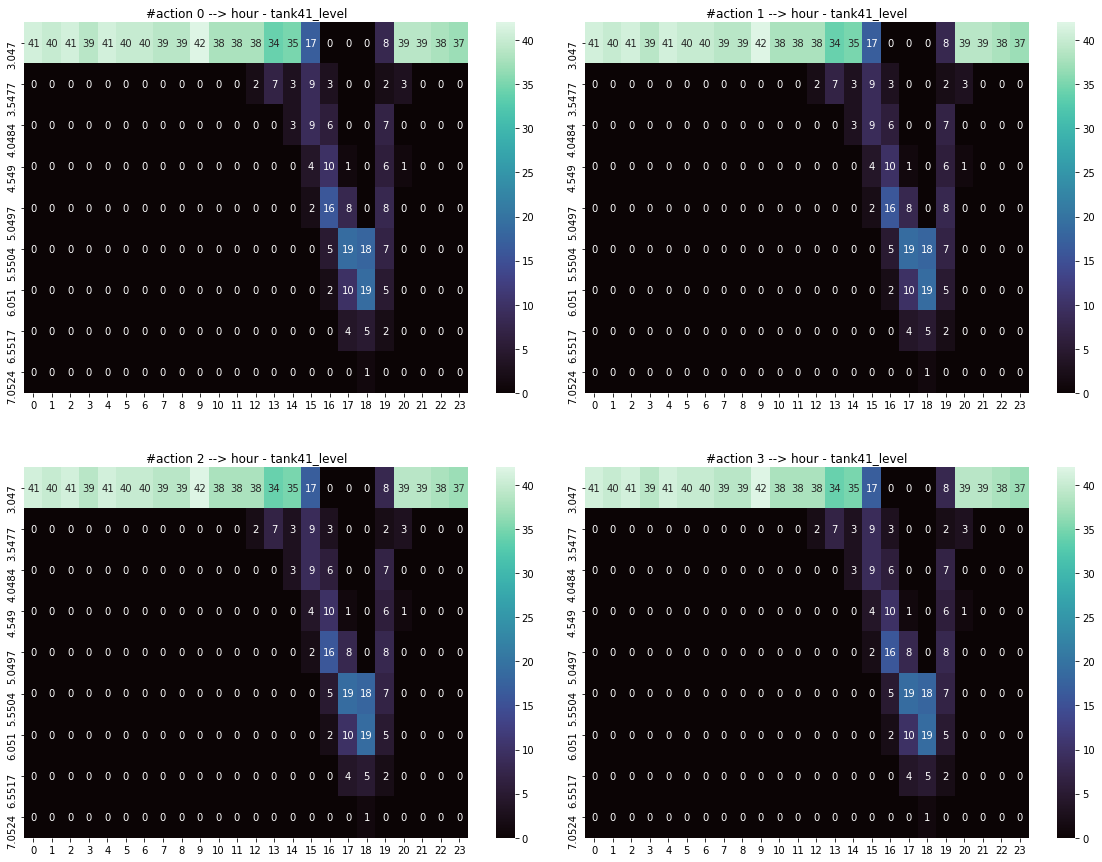

In [31]:
index = [str(round(min_level + int(key) * interval, 4)) for key in count_q_list[0].keys()]
columns = [str(i) for i in range(24)]

figure, axs = plt.subplots(2, 2, figsize=(20,15))
figure.subplots_adjust(hspace = .2, wspace=.01)

axs = axs.ravel()

for i in range(4):
    qs = list(count_q_list[i].values())
    df = pd.DataFrame(qs, index=index, columns=columns)
    sns.heatmap(df, ax=axs[i], cmap='mako',annot=True)
       
axs[0].set_title("#action 0 --> hour - tank41_level")
axs[1].set_title("#action 1 --> hour - tank41_level")
axs[2].set_title("#action 2 --> hour - tank41_level")
axs[3].set_title("#action 3 --> hour - tank41_level")

Let's see which are the action chosen in the different situations by the algorithm.

In [32]:
#model = results_full
#model = results_step_update
#model  = results_model_full
model = results_new
seed = 0

tank41_levels = [model[seed]['dataset']['current_state'][i][2] for i in range(1, len(model[seed]['dataset']))]
max_level = max(tank41_levels)
min_level = min(tank41_levels)

print("min level: ", min_level)
print("max level: ", max_level)

interval = (max_level - min_level) / 8
tmp_dataset = crop_dataset(model, seed).iloc[1:, :]

count_q_list = []

for action in range(4):
    count_q = {str(key): [0] * 24 for key in range(9)}

    for i in range(len(tmp_dataset)):
        if action == tmp_dataset.iloc[i]['action']:
            mod = str(int((tmp_dataset['current_state'].iloc[i][2] - min_level) // interval))
            hour = int(tmp_dataset['current_state'].iloc[i][0] // 3600)
            count_q[mod][hour] += 1
    
    count_q_list.append(count_q)

min level:  3.047031
max level:  7.0523586


Text(0.5, 1.0, '#action 3 --> hour - tank41_level')

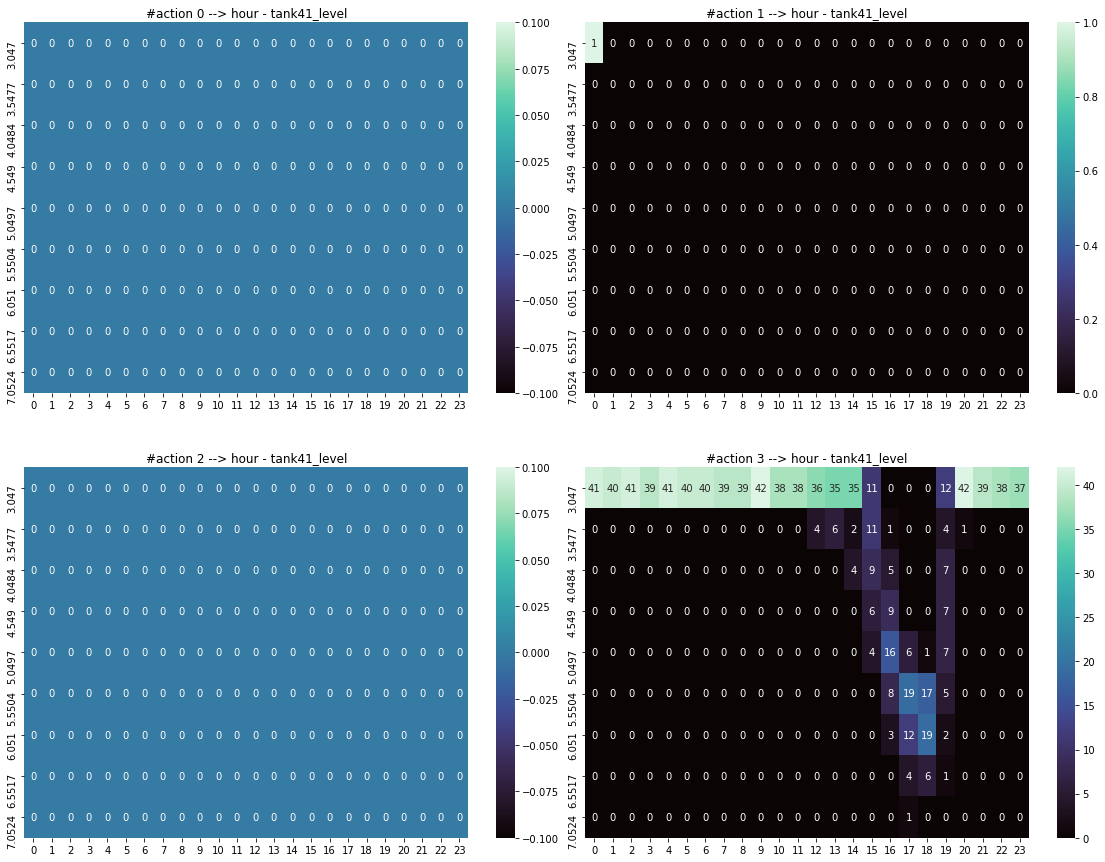

In [33]:
index = [str(round(min_level + int(key) * interval, 4)) for key in count_q_list[0].keys()]
columns = [str(i) for i in range(24)]

figure, axs = plt.subplots(2, 2, figsize=(20,15))
figure.subplots_adjust(hspace = .2, wspace=.01)

axs = axs.ravel()

for i in range(4):
    qs = list(count_q_list[i].values())
    df = pd.DataFrame(qs, index=index, columns=columns)
    sns.heatmap(df, ax=axs[i], cmap='mako',annot=True)
       
axs[0].set_title("#action 0 --> hour - tank41_level")
axs[1].set_title("#action 1 --> hour - tank41_level")
axs[2].set_title("#action 2 --> hour - tank41_level")
axs[3].set_title("#action 3 --> hour - tank41_level")

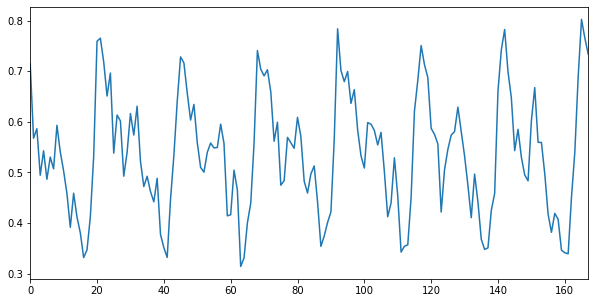

In [34]:
df_pat = pd.read_csv("../demand_patterns/demands_anytown.csv")
df_seed = df_pat[str(130 + seed)]
df_seed.plot(figsize=(10,5))

In [35]:
avg_per_hour = [0]*24
for i in df_seed.index:
    mod = i % 24
    avg_per_hour[mod] += df_seed[i]

avg_per_hour = [elem / 7 for elem in avg_per_hour]
avg_per_hour

[0.6493533008938873,
 0.5834927342800916,
 0.5834862519166133,
 0.5095298384264468,
 0.5042219753292726,
 0.5375756049261379,
 0.5764984090917235,
 0.5727891854700423,
 0.589376069270345,
 0.564129388633312,
 0.5067541993813064,
 0.4470545695601071,
 0.42859737282264637,
 0.4805455996314266,
 0.44445290014283767,
 0.35487558035575517,
 0.34760000609700875,
 0.3612293678086442,
 0.43547750478974595,
 0.5444613942483367,
 0.7080182067113163,
 0.7421643615320478,
 0.7237370165626731,
 0.6901091524241206]

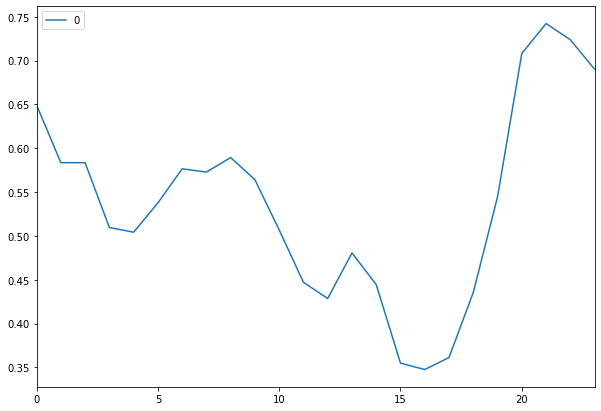

In [36]:
df_seed_aggr = pd.DataFrame(data=avg_per_hour)
df_seed_aggr.plot(figsize=(10,7))

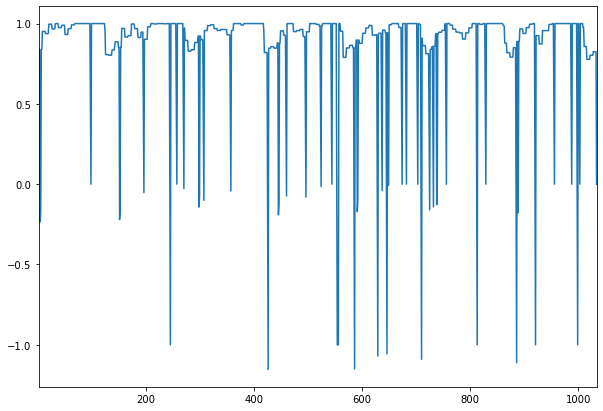

In [37]:
model = results_full
model  = results_model_full
seed = 0

tmp_dataset = crop_dataset(model, seed).iloc[1:, :]
tmp_dataset['reward'].plot(figsize=(10,7))

In [40]:
print(tmp_dataset['action'].to_string())

1       [3]
2       [3]
3       [3]
4       [1]
5       [3]
6       [3]
7       [3]
8       [3]
9       [3]
10      [3]
11      [3]
12      [3]
13      [3]
14      [3]
15      [3]
16      [3]
17      [3]
18      [3]
19      [3]
20      [3]
21      [3]
22      [3]
23      [3]
24      [3]
25      [3]
26      [3]
27      [3]
28      [3]
29      [3]
30      [3]
31      [3]
32      [3]
33      [3]
34      [3]
35      [3]
36      [3]
37      [3]
38      [3]
39      [3]
40      [3]
41      [3]
42      [3]
43      [3]
44      [3]
45      [3]
46      [3]
47      [3]
48      [3]
49      [3]
50      [3]
51      [3]
52      [3]
53      [3]
54      [3]
55      [3]
56      [3]
57      [3]
58      [3]
59      [3]
60      [3]
61      [3]
62      [3]
63      [3]
64      [3]
65      [3]
66      [3]
67      [3]
68      [3]
70      [3]
71      [3]
72      [3]
73      [3]
74      [3]
75      [3]
76      [3]
77      [3]
78      [3]
79      [3]
80      [3]
81      [3]
82      [3]
83      [3]
84      [3]
85  

In [1]:
df = pd.DataFrame(data, index=index, columns=columns)
    
    figure, ax = plt.subplots(figsize=(10,7))
    if color:
        ax = sns.heatmap(df, cmap=color, annot=annot)
    else:
        ax = sns.heatmap(df, annot=annot)
    
    if title:
        ax.set_title(title)

IndentationError: unexpected indent (<ipython-input-1-06b60861d836>, line 3)

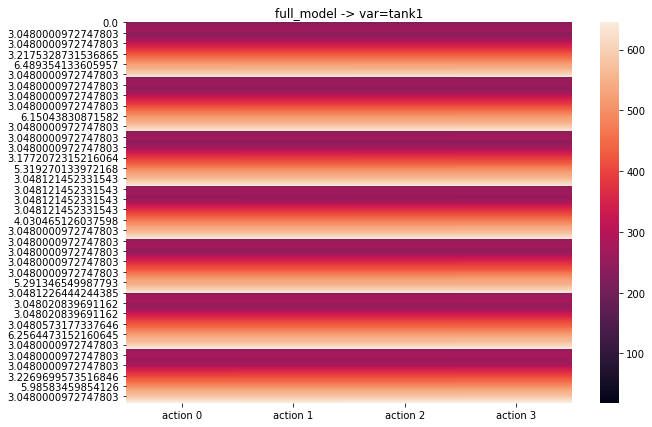

In [77]:
model = results_full
seed = 0

qs = [model[seed]['q_values'][i][1] for i in range(len(model[seed]['q_values']))]
tmp_dataset = crop_dataset(model, seed)
index = [tmp_dataset[i][2] for i in range(len(tmp_dataset))]

plot_model_heatmap(qs, index, title='full_model -> var=tank1')

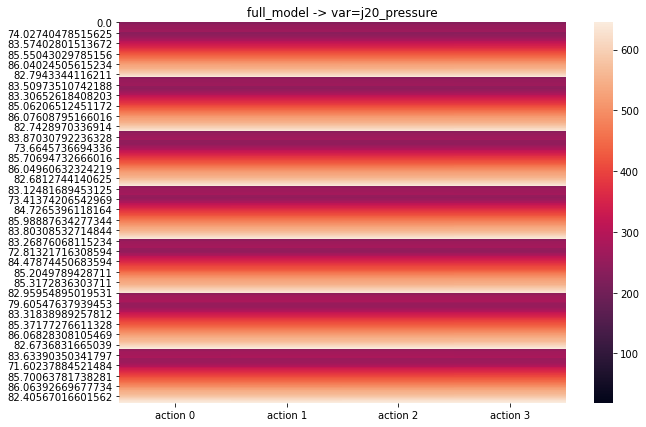

In [78]:
model = results_full
seed = 0

qs = [model[seed]['q_values'][i][1] for i in range(len(model[seed]['q_values']))]
tmp_dataset = crop_dataset(model, seed)
index = [tmp_dataset[i][4] for i in range(len(tmp_dataset))]

plot_model_heatmap(qs, index, title='full_model -> var=j20_pressure')

##### Let's see the amount of the maximum difference between two action of the same sample

In [79]:
models = [results_full, results_notime, results_noday, results_notanklevel, results_nojuncpressure]
max_q_diff = []  

for model in models:
    for seed in range(5):
        max_q_diff.append(max([max(model[seed]['q_values'][i][1]) - min(model[seed]['q_values'][i][1]) for i in range(len(model[seed]['q_values']))]))

In [80]:
max_q_diff

[0.9105224609375,
 0.919281005859375,
 0.9156494140625,
 0.924896240234375,
 0.924896240234375,
 0.16986656188964844,
 0.16986656188964844,
 0.16986656188964844,
 0.16986656188964844,
 0.16986656188964844,
 2.786865234375,
 2.797607421875,
 2.786865234375,
 2.786865234375,
 2.7978515625,
 1.2595996856689453,
 1.259592056274414,
 1.25872802734375,
 1.2595653533935547,
 1.2595844268798828,
 1.2595996856689453,
 1.259592056274414,
 1.25872802734375,
 1.2595653533935547,
 1.2595844268798828]

Since we don't have a huge difference between the Q-values of different actions with respect to their actual Q-values, heatmaps won't give us meaningful results.

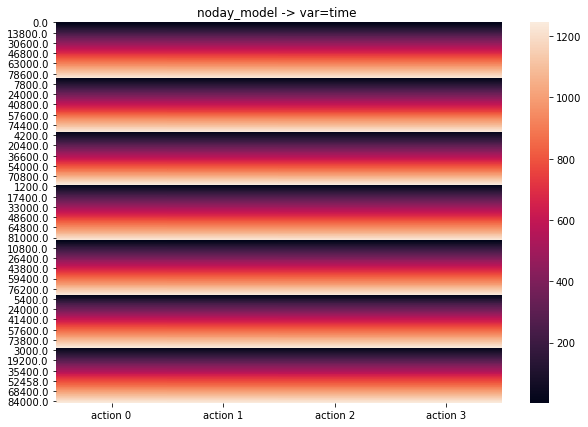

In [81]:
model = results_noday
seed = 4

qs = [model[seed]['q_values'][i][1] for i in range(len(model[seed]['q_values']))]
index = [model[seed]['q_values'][i][0][0] for i in range(len(model[seed]['q_values']))]

plot_model_heatmap(qs, index, title='noday_model -> var=time ')

##### Let's see how big are the q-values for the different models

In [82]:
models = [results_full, results_notime, results_noday, results_notanklevel, results_nojuncpressure]
<

for model in models:
    for seed in range(5):
        max_qs.append(max([max(model[seed]['q_values'][i][1]) for i in range(len(model[seed]['q_values']))]))
        min_qs.append(min([min(model[seed]['q_values'][i][1]) for i in range(len(model[seed]['q_values']))]))

In [83]:
max_qs, min_qs

([644.8926391601562,
  645.296630859375,
  644.940185546875,
  645.2981567382812,
  645.2955932617188,
  105.05526733398438,
  105.25029754638672,
  106.92715454101562,
  105.40074157714844,
  105.30223083496094,
  1239.677490234375,
  1244.968017578125,
  1239.677490234375,
  1239.677490234375,
  1245.18359375,
  1358.9031982421875,
  1358.9031982421875,
  1358.9031982421875,
  1358.9031982421875,
  1358.9031982421875,
  1358.9031982421875,
  1358.9031982421875,
  1358.9031982421875,
  1358.9031982421875,
  1358.9031982421875],
 [18.866453170776367,
  18.866453170776367,
  18.866453170776367,
  18.866453170776367,
  18.866453170776367,
  6.5227370262146,
  6.5227370262146,
  6.5227370262146,
  6.5227370262146,
  6.5227370262146,
  3.2363855838775635,
  3.6130082607269287,
  3.2363855838775635,
  3.2363855838775635,
  3.2363855838775635,
  8.234898567199707,
  8.234898567199707,
  8.234898567199707,
  8.234898567199707,
  8.234898567199707,
  8.234898567199707,
  8.234898567199707,
  8

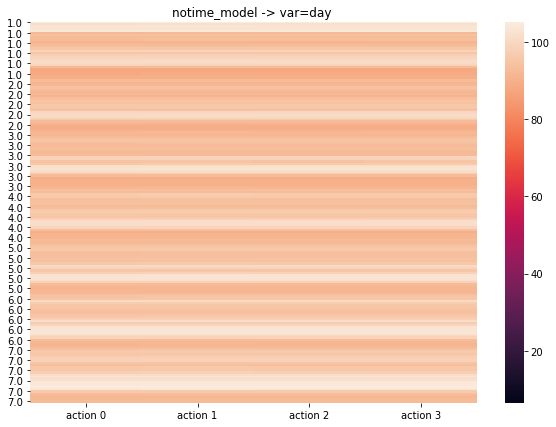

In [84]:
model = results_notime
seed = 0

qs = [model[seed]['q_values'][i][1] for i in range(len(model[seed]['q_values']))]
index = [model[seed]['q_values'][i][0][0] for i in range(len(model[seed]['q_values']))]

plot_model_heatmap(qs, index, title='notime_model -> var=day ')

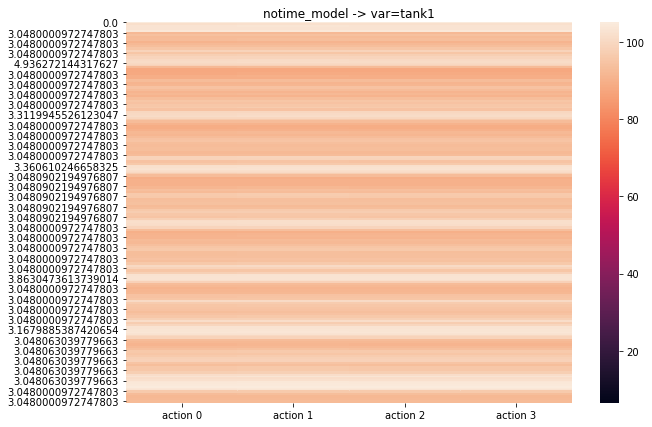

In [85]:
model = results_notime
seed = 0

qs = [model[seed]['q_values'][i][1] for i in range(len(model[seed]['q_values']))]
index = [model[seed]['q_values'][i][0][1] for i in range(len(model[seed]['q_values']))]

plot_model_heatmap(qs, index, title='notime_model -> var=tank1')

In [86]:
model[0]['dataset']

,current_state,action,reward,next_state,absorbing_state,last_step
0,"[1.0, 0.0, 0.0, 0.0]",[3],1.000000,"[1.0, 3.0500748, 3.0476344, 85.35038]",False,False
1,"[1.0, 3.0500748, 3.0476344, 85.35038]",[1],0.968062,"[1.0, 3.048419, 3.048, 84.71333]",False,False
2,"[1.0, 3.048419, 3.048, 84.71333]",[1],0.968056,"[1.0, 3.048, 3.048, 84.71315]",False,False
3,"[1.0, 3.048, 3.048, 84.71315]",[1],0.838435,"[1.0, 3.048, 3.048, 82.8128]",False,False
4,"[1.0, 3.048, 3.048, 82.8128]",[2],0.838435,"[1.0, 3.048, 3.048, 82.8128]",False,False
...,...,...,...,...,...,...
1015,"[7.0, 3.048, 3.048, 70.70122]",[1],0.751213,"[7.0, 3.048, 3.048, 70.70122]",False,False
1016,"[7.0, 3.048, 3.048, 70.70122]",[1],0.751213,"[7.0, 3.048, 3.048, 70.70122]",False,False
1017,"[7.0, 3.048, 3.048, 70.70122]",[1],0.751213,"[7.0, 3.048, 3.048, 70.70122]",False,False
1018,"[7.0, 3.048, 3.048, 70.70122]",[1],0.751213,"[7.0, 3.048, 3.048, 70.70122]",False,False


In [4]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [5]:
with open ('results', 'rb') as fp:
    results = pickle.load(fp)

In [6]:
len(results)

3

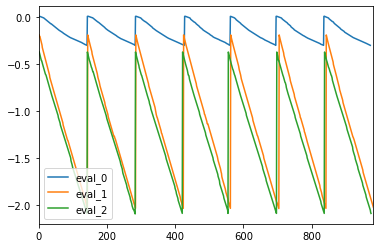

In [31]:
for j, res in enumerate(results):
    qs = ([q[1] for q in res['q_values']])
    df_qs = pd.DataFrame(qs, columns=['0', '1', '2', '3'])
    df_qs['3'].plot(label="eval_{}".format(j))
    plt.legend()
            
plt.show()

In [17]:
qs

[[[-0.6651521325111389,
   0.061523206532001495,
   0.014851033687591553,
   0.004489320330321789],
  [-0.6651443243026733,
   0.061520639806985855,
   0.014852434396743774,
   0.004487368278205395],
  [-0.6650439500808716,
   0.06148731708526611,
   0.014870688319206238,
   0.0044619617983698845],
  [-0.6794415712356567,
   0.056506816297769547,
   0.01865769922733307,
   0.005629722960293293],
  [-0.6813180446624756,
   0.05385958030819893,
   0.016431346535682678,
   0.004287044517695904],
  [-0.6827502250671387,
   0.05126417800784111,
   0.014611124992370605,
   0.002930278889834881],
  [-0.6841824054718018,
   0.048668790608644485,
   0.012790888547897339,
   0.0015735132619738579],
  [-0.6855987310409546,
   0.04610072076320648,
   0.010986655950546265,
   0.0002306392416357994],
  [-0.6870776414871216,
   0.043646376579999924,
   0.009082376956939697,
   -0.001045634038746357],
  [-0.6886051893234253,
   0.04133937135338783,
   0.007091209292411804,
   -0.0022377846762537956],


In [32]:
len(results[0]['dataset'])

1027

In [45]:
min([results[0]['q_values'][i][1][2] for i in range(len(results[0]['q_values']))])

-0.6032137870788574